<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [77]:
# Para que alguns mensagens de texto não invadam a sua célula podemos importar warnings
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once') para ve-lo apenas uma vez. 

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [78]:
dados = pd.read_csv('dados/Consumo_cerveja.csv', sep=';')

## Visualizar os dados

In [79]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando o tamanho do dataset

In [80]:
# Usando info() ou shape poderemos descobrir o numero de linhas e colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
data          365 non-null object
temp_media    365 non-null float64
temp_min      365 non-null float64
temp_max      365 non-null float64
chuva         365 non-null float64
fds           365 non-null int64
consumo       365 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.0+ KB


In [81]:
dados.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [82]:
# Vamos tentar achar algum comportamento estranho inicialmente olhando os dados abaixo
# Foi usado round() para arredondar para duas casas após a virgula
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [83]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

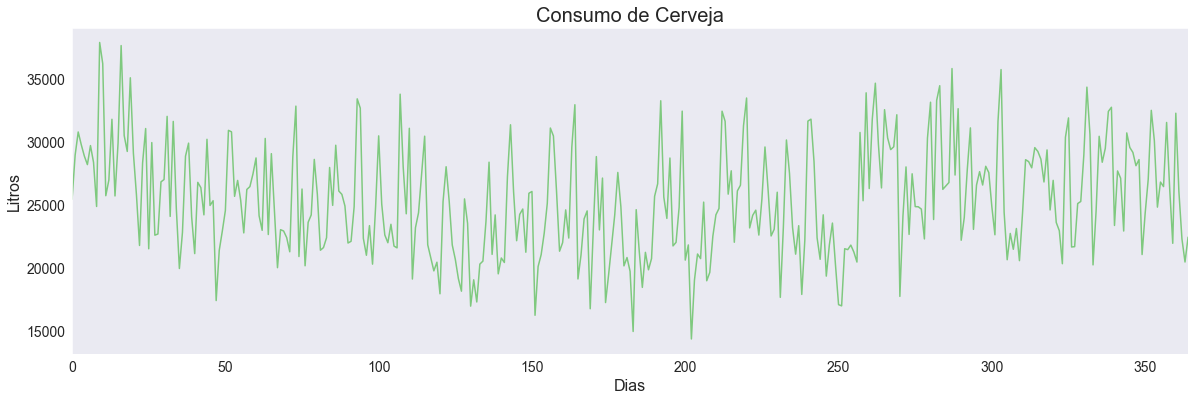

In [84]:
fig, ax = plt.subplots(figsize=(20, 6)) 
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

### Com o gráfico acima:
1. Dá pra perceber que não temos uma variancia anormal e absurda com quedas muito brutas ou sazonalidade exagerada,
2. Percebemos apenas algumas elevações e quedas suaves do consumo de cerveja ao dos dias.
Importante lembrar de configurar o título e as lables para facilitar a visualização


# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='dados/img/Box-Plot.png'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [85]:
import seaborn as sns

# Para melhorar a visualização podemos usar set_palette() e set_style() com as cores e stilos abaixo
# palette => Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')

# styles => white, dark, whitegrid, darkgrid, ticks
sns.set_style('dark')

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

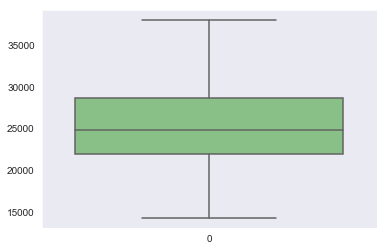

In [86]:
# Usando seaborn podemos entender que não há outliers(dados discrepantes) de acordo com o gráfico 
sns.boxplot(data = dados['consumo'], orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

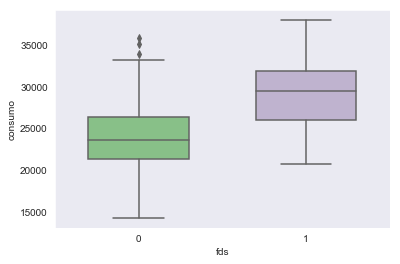

In [87]:
# Iremos trabalhar nosso consumo segundo o FDS usando, assim, 2 variáveis.
sns.boxplot(y = 'consumo', x = 'fds', data = dados, orient='v', width= 0.6)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

### Podemos perceber que:
1. Através destes 02 boxplots enxergamos claramente a olho nu que o consumo de cerveja cai bastante comparado ao fds
2. Essa pequena discrepancia encontrada durante a semana pode ser resultado de um feriado que possa ter ocorrido e que gerou esse maior consumo; porém demanda de mais atenção antes de simplesmente descartá-lo.

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

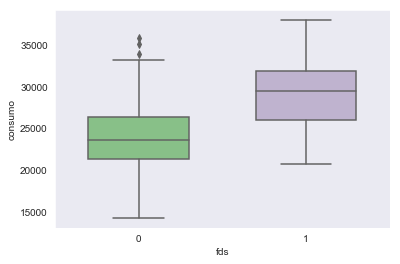

In [88]:
# Agora plotando o gráfico novamente
sns.boxplot(y = 'consumo', x = 'fds', data = dados, orient='v', width= 0.6)
ax.figure.set_size_inches(24, 12)
ax.set_title('Consumo de Cerveja', fontsize=50)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

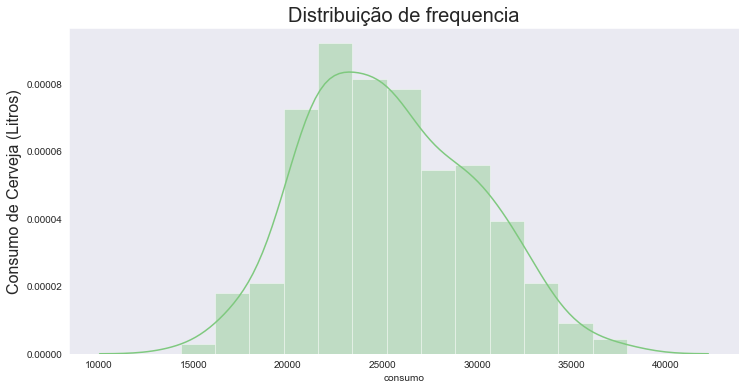

In [89]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequencia', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)
ax

### Ao analisar o gráfico:
Percebemos que a variável dependente segue a distribuição normal e através deste histograma podemos avaliar que este gráfico segue uma normalidade com pequena deformação no formato do sino.

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

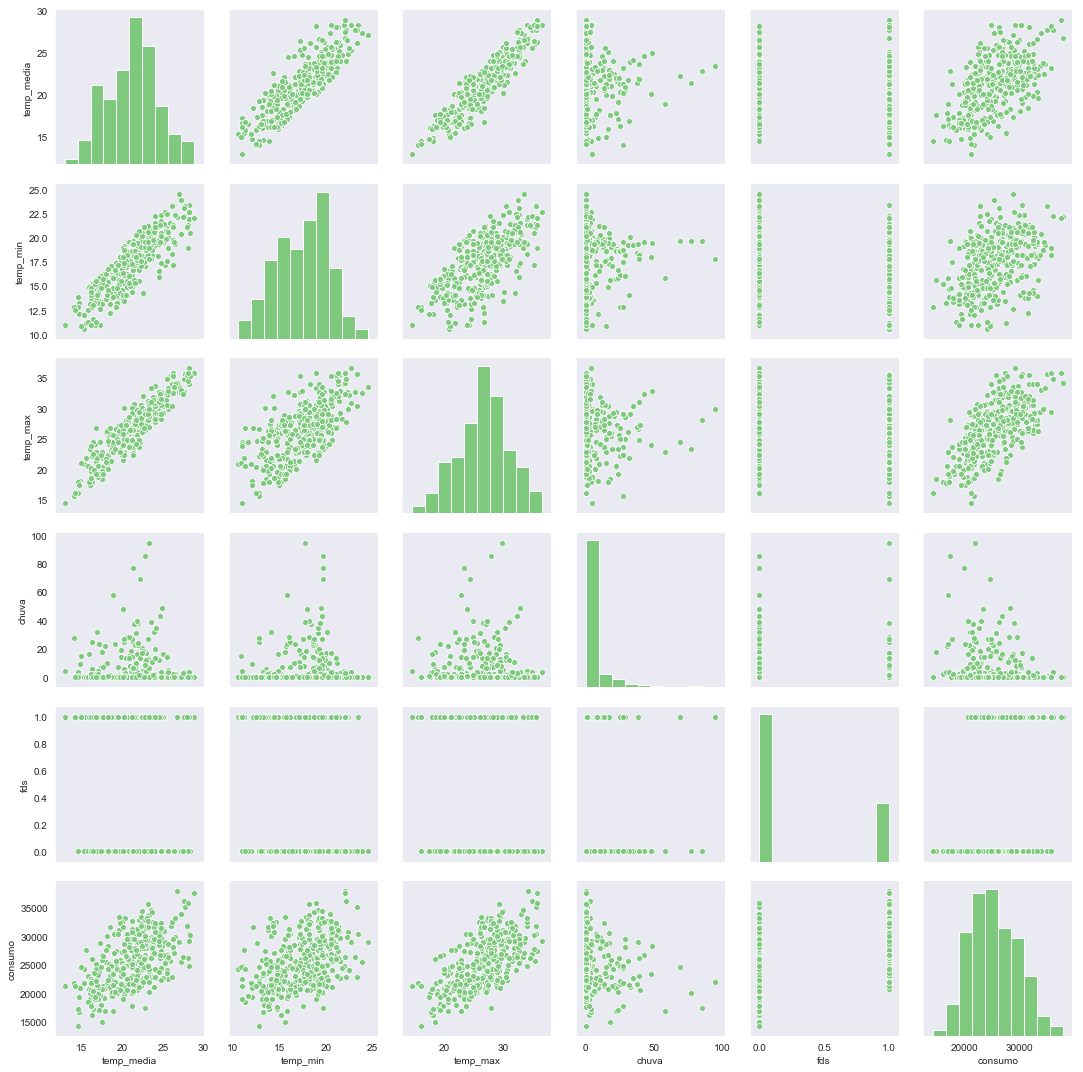

In [90]:
ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

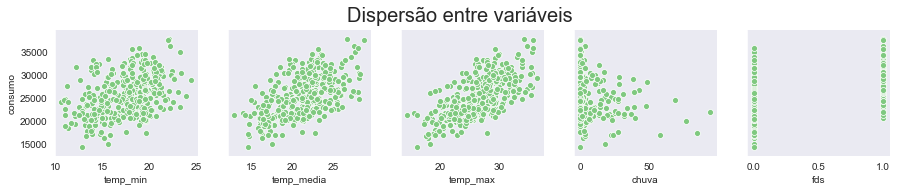

In [91]:
# Iremos plotar apenas os gráficos pertinentes ao nosso estudo usando consumo no eixo Y e o restante no eixo X
# Para que o título não fique em cima do gráfico usamos y=1.05 onde 0 seria levar o título para a parte de baixo e o 1 para a parte superior. 1.05 siginifca colocarmos um pouco acima
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.05)
ax

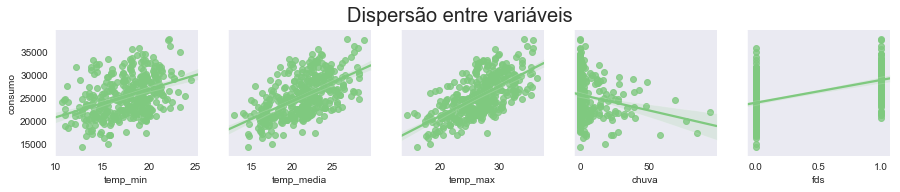

In [92]:
# Usaremos a mesma plotagem de cima, porém vamos incluir o kind='reg'que irá traçar essa reta de tendência para ajudar na visualização
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

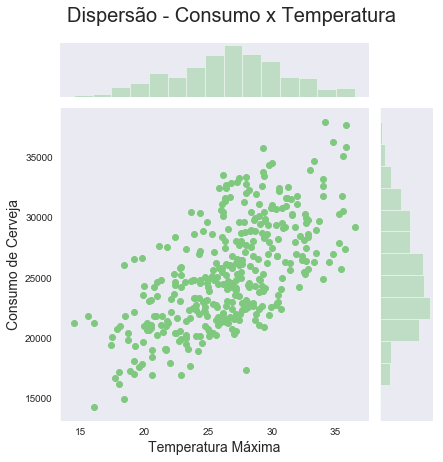

In [93]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados)
ax.fig.suptitle('Dispersão - Consumo x Temperatura', fontsize=20, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax

## Plotando um jointplot com a reta de regressão estimada

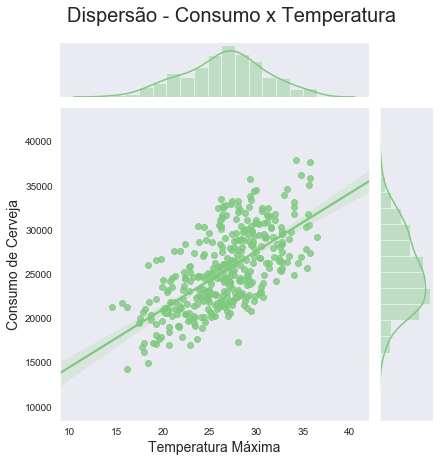

In [94]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo x Temperatura', fontsize=20, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

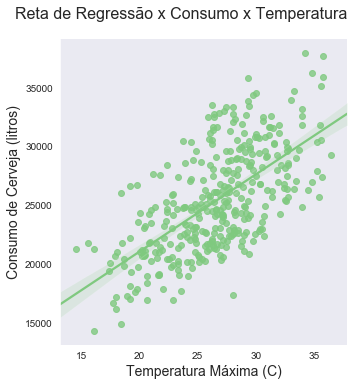

In [95]:
ax = sns.lmplot(x = 'temp_max', y = 'consumo' , data = dados)
ax.fig.suptitle('Reta de Regressão x Consumo x Temperatura', fontsize=16, y=1.05)
ax.set_xlabels('Temperatura Máxima (C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize=14)
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

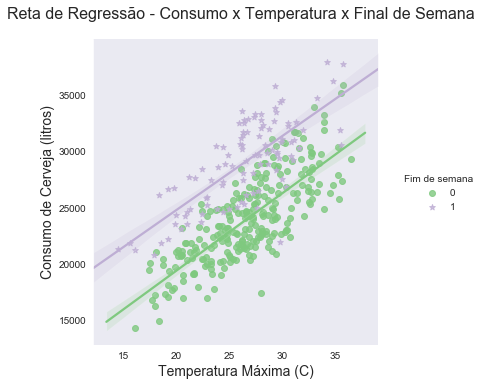

In [96]:
ax = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados, hue='fds', markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura x Final de Semana', fontsize=16, y=1.05)
ax.set_xlabels('Temperatura Máxima (C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize=14)
ax.add_legend(title='Fim de semana')
ax

<P>Desta forma fica visivel que o consumo no <b>fds é maior !</b></P>

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

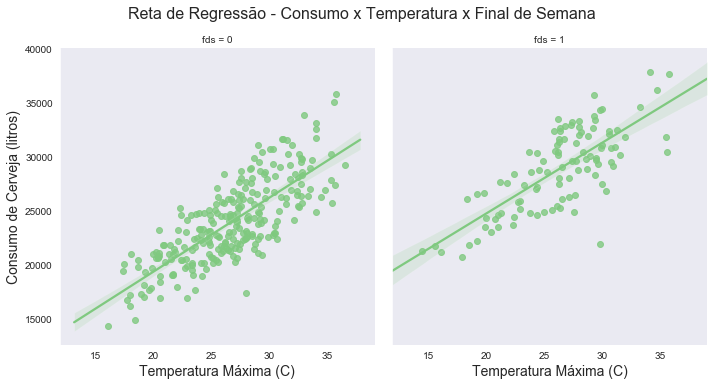

In [97]:
# Se a nuvem de consumo ficar muito densa e não conseguirmos enxergar direito o gráfico podemos fazer dessa maneira
# Não esquecer que fds = 0 é não e fds = 1 é sim!
ax = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados, col='fds')
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura x Final de Semana', fontsize=16, y=1.05)
ax.set_xlabels('Temperatura Máxima (C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [98]:
# Agora vamos importar a biblioteca para nosso modelo de treino e teste
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [99]:
# Chamando a variável dependente (consumo)
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [100]:
X = dados[['temp_max', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [101]:
# Exemplo: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [102]:
X_train.shape

(255, 3)

In [103]:
X_test.shape

(110, 3)

In [104]:
X_train.shape[0] + X_test.shape[0]

365

In [105]:
X.shape[0] * 0.3

109.5

In [106]:
X.shape[0] * 0.7

255.49999999999997

<img width='600px' src='dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics    

## Instanciando a classe *LinearRegression()*

In [108]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [109]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [110]:
print('R²= {}'.format(modelo.score(X_train, y_train).round(2))) # Falando em percentual temos o valor de 73%

R²= 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [111]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [112]:
print('R² = %s'% metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [113]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [114]:
# Aqui conseguimos usar o modelo e dizer que se tiver uma previsão de temp_max=30.5, chuva=12.2 e se for dia de semana o consumo médio estimado será de 26k Litros de Cerveja 
modelo.predict(entrada)[0] 

26094.901775262017

## Criando um simulador simples

In [115]:
# Usando os mesmo valores da entrada vamos simular uma previsão para ver se os valores batem 
temp_max=30.5
chuva=12.2
fds=0
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros.'.format(modelo.predict(entrada)[0]))

26094.90 litros.


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [116]:
# Aqui iremos explicar como obter o intercepto
modelo.intercept_ # Independente das outras variáveis o consumo médio de cerveja é aprox 6k

5951.976339312445

In [117]:
# Usando numpy descobrimos que o tipo do interceptor é float
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [118]:
# Ao analisar uma variável temos q levar em consideração que as outras variáveis tem valor constante 
# Vamos obter os coeficientes de regressão
modelo.coef_ # Aparecem na ordem em que entram no modelo: Temperatura Máxima, Chuva e Fds

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [119]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [120]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [121]:
# Vamos criar um indice
index=['Intercepto', 'Temperatura Máxima', 'Chuva', 'Final de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [122]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros']).round(2)

,Parâmetros
Intercepto,5951.98
Temperatura Máxima,684.74
Chuva,-60.78
Final de Semana,5401.08


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [123]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

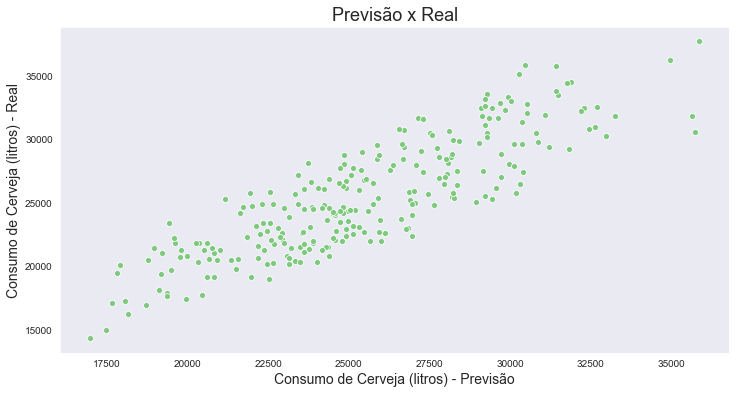

In [124]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

## Obtendo os resíduos

In [125]:
# Esse resíduo seria aquele erro no esquema gráfico lá no início do estudo. 
# A diferença entre o valor real (observado) e a estimativa do modelo é conhecido como resíduo.

residuo = y_train - y_previsto_train

In [126]:
residuo.head()

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
Name: consumo, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

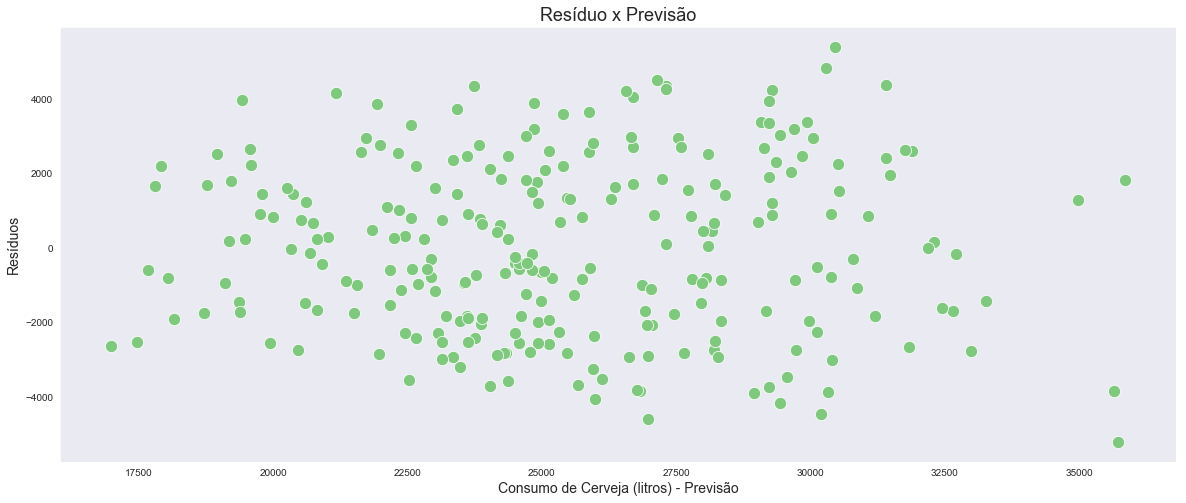

In [127]:
# Como vimos na explicação de cima os residuos tem q ser constantes; e no nosso caso eles são constantes(ver desenho abaixo)
ax = sns.scatterplot(x = y_previsto_train, y = residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduo x Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

## Utilizando os resíduos ao quadrado

<img width='800px' src='dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

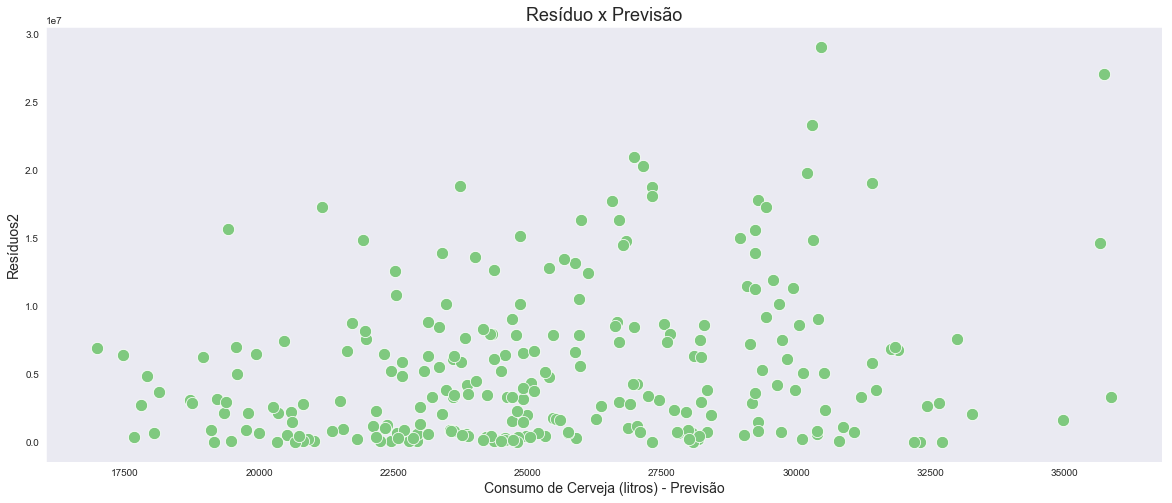

In [128]:
# Ao elevar o residuo ao quadrado poderemos analisar melhor o comportamento da variância ( constante ou não) dos residuos
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduo x Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos2', fontsize=14)
ax

#### Podemos observar que o gráfico segue o segundo exemplo (tipo um cone) 

## Plotando a distribuição de frequências dos resíduos

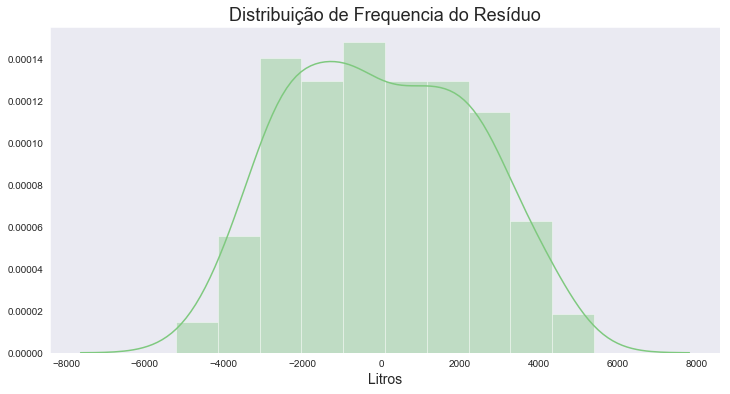

In [129]:
# Usando o histograma vamos plotar a distribuição da frequencia do resíduo
# A curva está meio atropelada mas beira o normal. Isso é bom!
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequencia do Resíduo', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [130]:
X2 = dados[["temp_media", "chuva", "fds"]]

## Criando os datasets de treino e de teste

In [131]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [132]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [133]:
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [134]:
print("Modelo com Temp. Média")
print('R²= {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temp. Média
R²= 0.66


In [135]:
print("Modelo com Temp. Máxima")
print('R²= {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temp. Máxima
R²= 0.73


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [136]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [137]:
print("Modelo com Temp. Média")
print('R²= {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))

Modelo com Temp. Média
R²= 0.66


In [138]:
print("Modelo com Temp. Máxima")
print('R²= {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com Temp. Máxima
R²= 0.69


* Utilizando o R² tiramos a conclusão de que o modelo Temp. Máxima explica melhor a variação do consumo do que o Modelo Temp. Média pq o R²= 0.69(Temp. Máx) está mais próximo de 1.0 

# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [139]:
# Assim teremos uma tabela com 3 metricas de comparação
# Quanto menor o valor (erro) melhor para o nosso modelo
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)

# Valor calcular a Raiz (R=Raiz)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)

# Vamos calcular novamente o R
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

# Vamos criar uma tabela para apresentação formal
pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [141]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


* EQM = 5471976.38 é o melhor pois tem q possuir o menor valor possível
* REQM = 2339.23 de litros é o melhor pois tem q possuir o menor valor possível
* R² = 0.69 é o melhor pois se aproxima mais do 1.0

Portanto o Modelo com Temp. Máxima nos traz um modelo com menor erro de precisão no comparativo com o Modelo de Temp. Média

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [142]:
X_test[:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [143]:
entrada = X_test[:1]

## Gerando previsão pontual

In [144]:
# Usando aquele modelo da temp. máxima pois era o mais indicado
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [153]:
# Conforme variamos os valores das variáveis teremos novos valores de previsão
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [154]:
import pickle

In [156]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

### Criando uma interface para uso do Simulador

In [157]:
# Vamos criar uma nova variável e chamar o nosso modelo
modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

In [172]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Criando os controles do formulário
temp_max = widgets.Text(description="Temp. Máx")
chuva = widgets.Text(description="Chuva")
fds = widgets.RadioButtons(options=[1, 0], description="Fds")

botao = widgets.Button(description="Simular")
botao_clear = widgets.Button(description="Limpar")

# Posicionando os controles
left = VBox([temp_max, chuva])
right = VBox([fds])
inputs = HBox([left, right])

# Função de simulação
def simulador(sender):
    entrada=[[
                float(temp_max.value if temp_max.value else 0), 
                float(chuva.value if chuva.value else 0), 
                float(fds.value) 
             ]]
    print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
    
# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador)  

In [175]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())